In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
# Open file (skip first four rows).
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv', skiprows=4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [3]:
# Check variable types.
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [4]:
# Rename columns.
df.rename(columns={'Population': 'population', 'Murder and\nnonnegligent\nmanslaughter': 'murder', 'Robbery': 'robbery', 'Property\ncrime': 'property_crime'}, inplace=True)

# Create subset.
df2 = df[['population', 'murder', 'robbery', 'property_crime']]

# Return the rows with null values.
df2[df2.isnull().any(axis=1)]

,population,murder,robbery,property_crime
348,NaN,NaN,NaN,NaN
349,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN


In [5]:
# Drop the null values.
df2 = df2.dropna()
df2.tail()

,population,murder,robbery,property_crime
343,"10,685",0.0,2,541
344,829,0.0,0,17
345,"5,931",0.0,0,58
346,"199,134",6.0,390,"2,368"
347,"36,643",0.0,2,334


In [6]:
# Remove commas and convert columns to numeric.
df2.loc[:,'property_crime'] = df2.loc[:,'property_crime'].str.replace(',', '')
df2.loc[:,'population'] = df2.loc[:,'population'].str.replace(',', '')
df2.loc[:,'robbery'] = df2.loc[:,'robbery'].str.replace(',', '')
df2.loc[:,'property_crime'] = pd.to_numeric(df2.loc[:,'property_crime'])
df2.loc[:,'population'] = pd.to_numeric(df2.loc[:,'population'])
df2.loc[:,'robbery'] = pd.to_numeric(df2.loc[:,'robbery'])

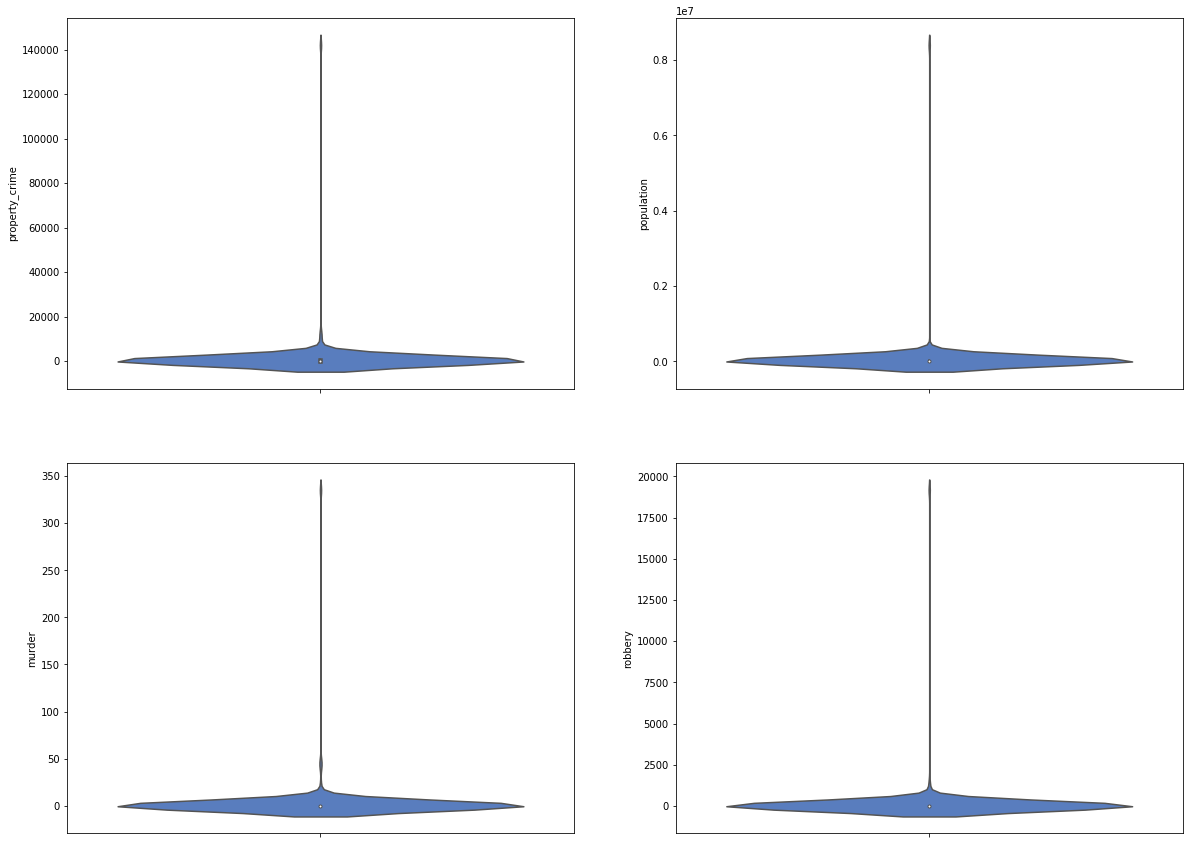

In [7]:
# Check for outliers.
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.violinplot(y='property_crime', palette='muted', data=df2, ax=ax1)
sns.violinplot(y='population', palette='muted', data=df2, ax=ax2)
sns.violinplot(y='murder', palette='muted', data=df2, ax=ax3)
sns.violinplot(y='robbery', palette='muted', data=df2, ax=ax4)
plt.show()

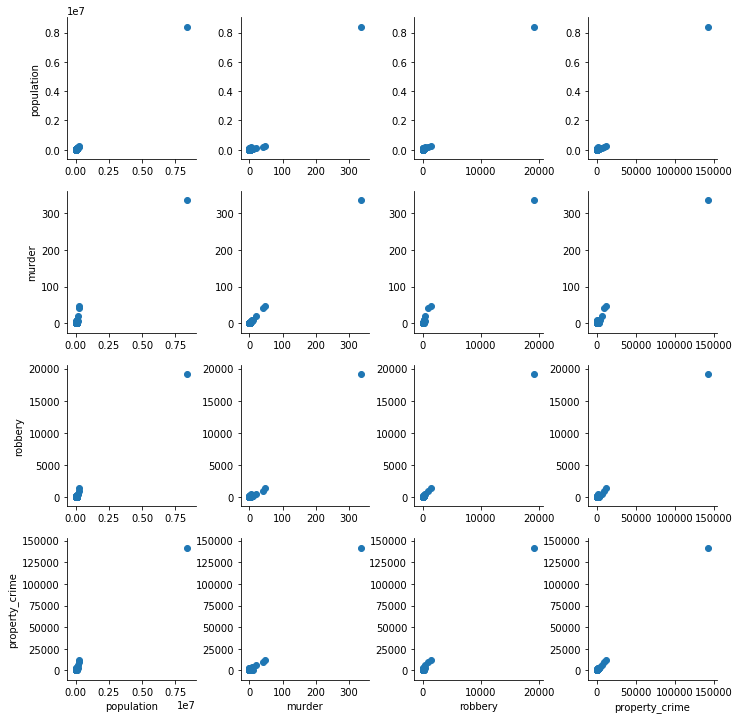

In [8]:
g = sns.PairGrid(df2)
g = g.map(plt.scatter)

In [9]:
# Verify outlier.
print(df2['property_crime'].sort_values(ascending=False).head())
print('\n')
print(df2['population'].sort_values(ascending=False).head())
print('\n')
print(df2['murder'].sort_values(ascending=False).head())
print('\n')
print(df2['robbery'].sort_values(ascending=False).head())

216    141971
35      12491
272     10051
310      6473
3        4090
Name: property_crime, dtype: int64


216    8396126
35      258789
272     210562
346     199134
310     143834
Name: population, dtype: int64


216    335.0
35      47.0
272     42.0
310     21.0
140     10.0
Name: murder, dtype: float64


216    19170
35      1322
272      918
310      400
346      390
Name: robbery, dtype: int64


In [10]:
# Remove outlier.
df3 = df2.drop(df2.idxmax())

In [11]:
# Create features.
df3['population_squared'] = df3['population'] * df3['population']
df3['murder_category'] = np.where(df3['murder']>0, 1, 0)
df3['robbery_category'] = np.where(df3['robbery']>0, 1, 0)
df3.head()

,population,murder,robbery,property_crime,population_squared,murder_category,robbery_category
0,1861,0.0,0,12,3463321,0,0
1,2577,0.0,0,24,6640929,0,0
2,2846,0.0,0,16,8099716,0,0
3,97956,8.0,227,4090,9595377936,1,1
4,6388,0.0,4,223,40806544,0,1
